In [ ]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [ ]:
(training_images,training_labels),(testing_images,testing_labels)= datasets.cifar10.load_data()
training_images,testing_images=training_images/255,testing_images/255

In [3]:
print(f'we have {len(training_images)} items in training_images')
print(f'we have {len(training_labels)} items in training_labels')
print(f'we have {len(testing_images)} items in testing_images')
print(f'we have {len(testing_labels)} items in testing_labels')

we have 50000 items in training_images
we have 50000 items in training_labels
we have 10000 items in testing_images
we have 10000 items in testing_labels


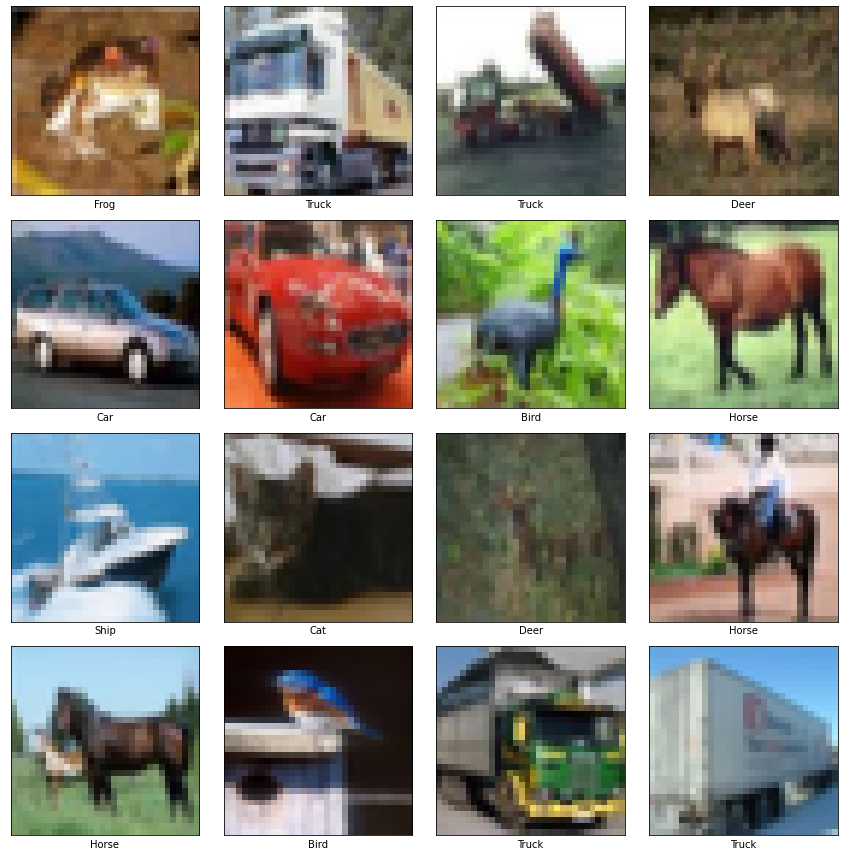

In [4]:
class_names=['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
plt.figure(figsize=(12, 12))
    
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow((training_images[i]),cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
      
plt.tight_layout()
plt.show()






In [5]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
import tensorflow as tf

In [6]:

training_images=training_images[:20000]
training_labels=training_labels[:20000]
testing_images=testing_images[:4000]
testing_labels=testing_labels[:4000]

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3))) # pic1  # parms =[(3*3 is kernel_size *3 is channel_rgb)+ 1 is bias ]*32 is number_filters = 896 
model.add(layers.MaxPooling2D((2, 2)))    # pic12           
model.add(layers.Conv2D(64,(3, 3), activation='relu'))    #pic13
model.add(layers.MaxPooling2D((2, 2))) # pic14
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    # pic15
model.add(layers.Dropout(0.2))    
model.add(layers.Flatten())   # input layer for nn model 
model.add(layers.Dense(64, activation='relu'))    # hidden layer 
model.add(layers.Dense(10, activation='softmax')) # output layer   


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,training_labels,epochs=10,validation_data=(testing_images,testing_labels))


   

Epoch 1/10
625/625 [==============================] - 86s 124ms/step - loss: 1.7851 - accuracy: 0.3361 - val_loss: 1.6648 - val_accuracy: 0.3913
Epoch 2/10
625/625 [==============================] - 76s 121ms/step - loss: 1.4410 - accuracy: 0.4762 - val_loss: 1.3003 - val_accuracy: 0.5330
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 1.2903 - accuracy: 0.5389 - val_loss: 1.2252 - val_accuracy: 0.5600
Epoch 4/10
625/625 [==============================] - 417s 667ms/step - loss: 1.1770 - accuracy: 0.5811 - val_loss: 1.1971 - val_accuracy: 0.5707
Epoch 5/10
625/625 [==============================] - 78s 125ms/step - loss: 1.0961 - accuracy: 0.6124 - val_loss: 1.0893 - val_accuracy: 0.6145
Epoch 6/10
625/625 [==============================] - 77s 123ms/step - loss: 1.0310 - accuracy: 0.6345 - val_loss: 1.0965 - val_accuracy: 0.6030
Epoch 7/10
625/625 [==============================] - 75s 120ms/step - loss: 0.9735 - accuracy: 0.6548 - val_loss: 1.0560 - val_a

In [7]:
loss,accuracy=model.evaluate(testing_images,testing_labels)
print(f"loss:{loss}")
print(f"Accuracy:{accuracy}")

125/125 [==============================] - 6s 45ms/step - loss: 1.0399 - accuracy: 0.6435
loss:1.0398914813995361
Accuracy:0.6434999704360962


In [8]:
model.save('image_classifier.model')

INFO:tensorflow:Assets written to: image_classifier.model\assets


In [9]:
model= models.load_model('image_classifier.model')

In [10]:
print(f'we have {len(training_images)} items in training_images')
print(f'we have {len(training_labels)} items in training_labels')
print(f'we have {len(testing_images)} items in testing_images')
print(f'we have {len(testing_labels)} items in testing_labels')

we have 20000 items in training_images
we have 20000 items in training_labels
we have 4000 items in testing_images
we have 4000 items in testing_labels


In [11]:
import cv2                     #old interface in old OpenCV versions was named as cv 
import numpy as np

NumPy array info:
<class 'numpy.ndarray'>
Predictions:
[[1.9725228e-03 1.3175615e-04 6.6959925e-02 2.3747286e-01 3.5713279e-01
  1.5923803e-01 1.1042181e-02 1.6154556e-01 3.0737380e-03 1.4306627e-03]]
4
prediction is Deer


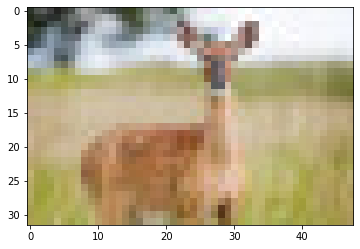

In [14]:
from keras.preprocessing.image import img_to_array
image=cv2.imread(r'C:\Users\user\Documents\project_nn\deer.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB )
plt.imshow(image)
image= img_to_array(image)
print("NumPy array info:")  
print(type(image))  
image = cv2.resize(image, (32,32))
prediction=model.predict(np.array([image])/255)
print("Predictions:")
print(prediction)
print(np.argmax(prediction))
index=np.argmax(prediction)
print(f'prediction is {class_names[index]}')  


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0